In [2]:
import numpy as np
from sklearn import datasets

iris_X,iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [5]:
# 糖尿病を把握するデータセット
# データは、https://github.com/education454/diabetes_dataset/blob/master/diabetes.csvに定義されている
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)
# 損失値を求める
print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2))

# 正答率を求める
regr.score(diabetes_X_test,diabetes_y_test)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
2004.5676026898213


0.5850753022690574

In [3]:
np.random.seed(0)
# データセットを分割する train_test_splitと同じ処理
indices = np.random.permutation(len(iris_X)) # ランダムに取り出すデータ番号を決める
iris_X_train = iris_X[indices[:-10]] 
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

(150, 2) (61600, 2)
(150, 2) (61600, 2)


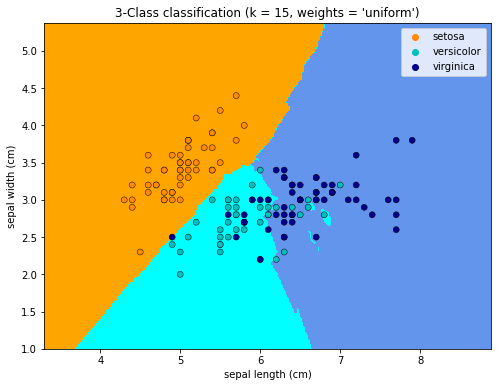

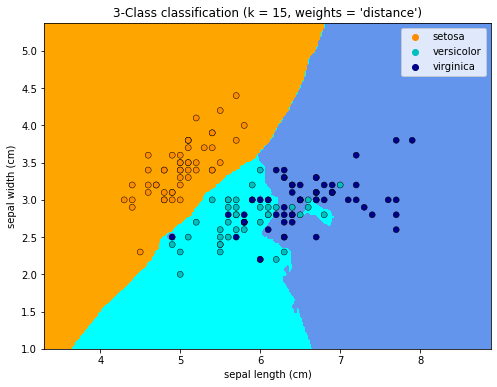

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
# ラベルの数分のカラーマップを定義する
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # がく弁の長さと幅の特徴量の最大値と最小値を抽出する
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # np.arangeで最大値から最小値までの範囲を生成、その後格子行列に変換
    # ２つの特徴量の対応する行列である必要があるため
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    ## 最小値から最大値まですべての点を入力し、予測値を抽出することでpltに色付けするためのデータが手に入る
    # 格子行列を一次元配列に戻し、２つの特徴量を結合し、モデルに入力する
    # clfの対応shapeはn*2次元であるため
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    # 色付けを行う
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    # データセットを二次元で２つの特徴量から散布図を生成
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    
plt.show()
